In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Directories for the images

# Directories for each class
kapha_dir = r'C:\Users\kaush\Downloads\eyes dataset\train\kapha'
pittha_dir = r'C:\Users\kaush\Downloads\eyes dataset\train\pittha'
vata_dir = r'C:\Users\kaush\Downloads\eyes dataset\train\vata'



# Load and preprocess images
def load_images_from_folder(folder, label):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, (128, 128))  # Resize to 128x128
            images.append((img, label))  # Append image and its label as tuple
    return images

# Load images
kapha_images = load_images_from_folder(kapha_dir, 0)  
pittha_images = load_images_from_folder(pittha_dir, 1) 
vata_images =load_images_from_folder(vata_dir, 2) 


# Data Augmentation
import cv2
import random

import cv2
import random
import numpy as np

def augment_images(images, label):
    augmented_images = []
    for img, _ in images:
        # Get image dimensions
        h, w = img.shape[:2]
        
        # Random cropping
        x_start = random.randint(0, int(0.1 * w))  # Random start for the x-axis
        y_start = random.randint(0, int(0.1 * h))  # Random start for the y-axis
        cropped_img = img[y_start:y_start + h - 20, x_start:x_start + w - 20]
        cropped_img = cv2.resize(cropped_img, (w, h))  # Resize back to original dimensions
        augmented_images.append((cropped_img, label))
        
        # Scaling
        scaled_img = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_LINEAR)
        scaled_img = cv2.resize(scaled_img, (w, h))  # Resize back to original dimensions
        augmented_images.append((scaled_img, label))
        
        # Random perspective transformation
        pts1 = np.float32([[0, 0], [w-1, 0], [0, h-1], [w-1, h-1]])  # Original points
        pts2 = np.float32([[random.randint(0, w//4), random.randint(0, h//4)],
                           [random.randint(w-1-w//4, w-1), random.randint(0, h//4)],
                           [random.randint(0, w//4), random.randint(h-1-h//4, h-1)],
                           [random.randint(w-1-w//4, w-1), random.randint(h-1-h//4, h-1)]])  # Transformed points
        matrix = cv2.getPerspectiveTransform(pts1, pts2)
        perspective_img = cv2.warpPerspective(img, matrix, (w, h))
        augmented_images.append((perspective_img, label))
         # Random cropping
        x_start = random.randint(0, int(0.1 * w))  # Random start for the x-axis
        y_start = random.randint(0, int(0.1 * h))  # Random start for the y-axis
        cropped_img = img[y_start:y_start + h - 20, x_start:x_start + w - 20]
        cropped_img = cv2.resize(cropped_img, (w, h))  # Resize back to original dimensions
        augmented_images.append((cropped_img, label))
        
        # Scaling
        scaled_img = cv2.resize(img, None, fx=1.2, fy=1.2, interpolation=cv2.INTER_LINEAR)
        scaled_img = cv2.resize(scaled_img, (w, h))  # Resize back to original dimensions
        augmented_images.append((scaled_img, label))
        
        # Random perspective transformation
        pts1 = np.float32([[0, 0], [w-1, 0], [0, h-1], [w-1, h-1]])  # Original points
        pts2 = np.float32([[random.randint(0, w//4), random.randint(0, h//4)],
                           [random.randint(w-1-w//4, w-1), random.randint(0, h//4)],
                           [random.randint(0, w//4), random.randint(h-1-h//4, h-1)],
                           [random.randint(w-1-w//4, w-1), random.randint(h-1-h//4, h-1)]])  # Transformed points
        matrix = cv2.getPerspectiveTransform(pts1, pts2)
        perspective_img = cv2.warpPerspective(img, matrix, (w, h))
        augmented_images.append((perspective_img, label))

    return augmented_images



# Apply 
augmented_kapha_images = augment_images(kapha_images, 0)  # Label 0 for benign
augmented_pittha_images = augment_images(pittha_images, 1)  # Label 1 for malignant
augmented_vata_images = augment_images(vata_images, 2)  # Label 1 for malignant

# Combine original and augmented images
data = kapha_images + pittha_images + vata_images + augmented_pittha_images+augmented_kapha_images+augmented_vata_images
X, y = zip(*data)  # Unzip the list of tuples into separate lists
X = np.array(X)
y = np.array(y)


# Normalize images for VGG-16
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
X = X / 255.0  # Scale pixel values to [0, 1]

# Reshape X to 128x128x3 for VGG-16 input (duplicate channels if grayscale)
X_reshaped = np.repeat(X, 3, axis=-1) if X.shape[-1] == 1 else X

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)

Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 20s 475ms/step - accuracy: 0.3436 - loss: 1.1919 - val_accuracy: 0.3943 - val_loss: 1.0868
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 363ms/step - accuracy: 0.3397 - loss: 1.1062 - val_accuracy: 0.3943 - val_loss: 1.0858
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 367ms/step - accuracy: 0.3691 - loss: 1.0944 - val_accuracy: 0.3943 - val_loss: 1.0905
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 369ms/step - accuracy: 0.3937 - loss: 1.0969 - val_accuracy: 0.3943 - val_loss: 1.0862
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 364ms/step - accuracy: 0.3262 - loss: 1.0956 - val_accuracy: 0.3943 - val_loss: 1.0864
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 360ms/step - accuracy: 0.3907 - loss: 1.1024 - val_accuracy: 0.3943 - val_loss: 1.0848
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 8s 367ms/step - accuracy: 0.4259 - loss: 1.0741 - val_accuracy: 0.3943 - val_loss: 1.0836
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 9s 388ms/step - accuracy: 0.4117 - loss: 1.0821 - val_accuracy: 0

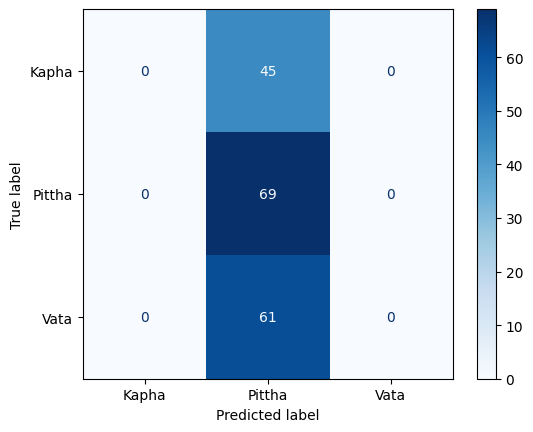

Accuracy: 39.43%
Classification Report:
              precision    recall  f1-score   support

       Kapha       0.00      0.00      0.00        45
      Pittha       0.39      1.00      0.57        69
        Vata       0.00      0.00      0.00        61

    accuracy                           0.39       175
   macro avg       0.13      0.33      0.19       175
weighted avg       0.16      0.39      0.22       175



C:\Users\kaush\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kaush\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\kaush\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [2]:
import os
import cv2
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0  # Use EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Build the EfficientNetB0 model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze the base model layers
base_model.trainable = False

# Add custom classification layers on top of EfficientNetB0
x = GlobalAveragePooling2D()(base_model.output)  # Use global average pooling instead of flattening
x = Dense(256, activation='relu')(x)  # Dense layer for feature learning
x = Dropout(0.5)(x)  # Dropout to prevent overfitting
output_layer = Dense(3, activation='softmax')(x)  # Output layer for 3 classes
model = Model(inputs=base_model.input, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Confusion Matrix and Accuracy Score
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Kapha', 'Pittha', 'Vata'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

accuracy = accuracy_score(y_test, y_pred_classes)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print Precision, Recall, and F1-Score
report = classification_report(y_test, y_pred_classes, target_names=['Kapha', 'Pittha', 'Vata'])
print("Classification Report:")
print(report)
